# TASK:

###Deadline: 10 martie ora 23:59.
###Formular pentru trimiterea temei: https://forms.gle/kMcWxv8e39wwXy1W7.


Folosind datasetul urmator, https://github.com/ancatache/LaRoSeDa/tree/main/data - o colectie de review-uri pentru produse in romana, rezolvati urmatoarele cerinte:

1. Curatati si normalizati corpus-ul aplicand urmatoarele operatiii:

    a) afisati caracterele diferite de literele mici ale alfabetului englez

    b) transformati numerele in cuvinte folosind num2words

    c) eliminati linkurile si alte referinte

    d) curatati-l de semnele de punctuatie

    e) impartiti textele in cuvinte (tokens), va recomandam sa folositi `spacy` incarcand unul din modelele pentru limba romana (https://spacy.io/models/ro)

    f) eliminati stopwords

    g) aplicati stemming

    h) aplicati lematizare peste cuvintele obtinute la punctul f. Comparand cu rezultatele de la punctul g, afisati top 15 cuvinte pentru care stemul este diferit de lema, sortate descrescator dupa numarul de caractere prin care stemul difera de lema.

    i) cautati top 20 trigrame (collocations)


2. Calculati frecventele de aparitie ale fiecarui token la punctul e) si punctul g). Plotati-le cum doriti, prin wordcloud sau plotbar. Ce diferente observati? (intrucat numarul de cuvinte distincte poate fi mare, puteti plota informatii doar despre cele mai frecvente N cuvinte)


In [2]:
import json
import re
from num2words import num2words

In [3]:
with open("positive_reviews.json", 'r') as fin:
    positive_reviews = json.load(fin)
with open("negative_reviews.json", 'r') as fin:
    negative_reviews = json.load(fin)
reviews_data = [review['content'] for review in [*positive_reviews['reviews'], *negative_reviews['reviews']]]
# small_reviews_data = reviews_data[:100]
print(reviews_data[:10])

['am analizat la sange toate bratarile de fitness si smartwatch-urile de pe piata de pana la 1.000 lei (bugetul maxim alocat de mine pentru aceasta investitie) si pot sa spun ca acesta avea cele mai pozite review-uri mai peste tot.... alternativa era un apple watch, al carui baterie nu tinea mult din ce am inteles (in jur de 1 zi jumatate).    despre ceas:    pro:   - l-am pus la incarcat in a 4-a zi, cu mentiunea ca inca mai avea 20% baterie (m-ar mai fi tinut o zi);  - pulsul este foarte precis - am testat comparativ cu un tensiometru si au aparut diferente de 1-2 batai pe minut (ceea ce este foarte bine);  - pasii sunt cat de cat corecti, cu o eroare de pana la 5% maximum, insa nu am stat sa verific fix pe fix sa vad daca e asa sau nu, aceasta fiind doar o estimare;  - alergatul il inregistreaza cum trebuie, la fel si exercitiile (le-am introdus la categoria "workout", insa sunt sigura ca si la celelalte functioneaza ok;  - somnul il monitorizeaza destul de foarte exact (daca ma rid

In [4]:
# 1 a)
# aici am 2 variante, prima e fara litere de orice fel si spatii, al 2-lea e mai permisiv
punctuation_set = []
# reviews_no_letters = [re.sub(r'[\w\s]', '', review) for review in reviews_data]
# >=✓¿»%↓"?@£¡}°✌‘…•\]$;❤“`'&×⛤☺”:—™’,̇！̶{⭐#–^|(+.-▪/!~)️→®<«*[€„
reviews_no_letters = [re.sub(r'[a-z]', '', review) for review in reviews_data]
# ✓»%ä↓?@é¡° ✌‘6$;❤8'×4☺”53™’！̶ğ9å–⭐#á^7|▪_-02~️)«®€„">=à¿ű1£}…•\]`“&⛤:—,íī̇{*ā+./ω!→ƒ<([
for punctuation in reviews_no_letters:
    punctuation_set = list(set(punctuation_set) | set(punctuation))
punctuation_set = "".join(punctuation_set)

print(punctuation_set)

5“¡{̶̇€⭐…`#/:”9!▪à$>'→.~4–™\•’=☺↓íā°?«+åω✓！£ī»[✌3|&*@(⛤—10ƒá")űğé8<6×ä®%¿];,7‘„^}-_️ 2❤


In [5]:
# 1 b)
reviews_with_numbers = []
for review in reviews_data:
    modified_data = re.sub(r"(\d+)", lambda x: num2words(int(x.group(0)), lang="romanian" ), review)
    reviews_with_numbers.append(modified_data)
print(reviews_with_numbers[:10])

['am analizat la sange toate bratarile de fitness si smartwatch-urile de pe piata de pana la unu.zero lei (bugetul maxim alocat de mine pentru aceasta investitie) si pot sa spun ca acesta avea cele mai pozite review-uri mai peste tot.... alternativa era un apple watch, al carui baterie nu tinea mult din ce am inteles (in jur de unu zi jumatate).    despre ceas:    pro:   - l-am pus la incarcat in a patru-a zi, cu mentiunea ca inca mai avea douăzeci% baterie (m-ar mai fi tinut o zi);  - pulsul este foarte precis - am testat comparativ cu un tensiometru si au aparut diferente de unu-doi batai pe minut (ceea ce este foarte bine);  - pasii sunt cat de cat corecti, cu o eroare de pana la cinci% maximum, insa nu am stat sa verific fix pe fix sa vad daca e asa sau nu, aceasta fiind doar o estimare;  - alergatul il inregistreaza cum trebuie, la fel si exercitiile (le-am introdus la categoria "workout", insa sunt sigura ca si la celelalte functioneaza ok;  - somnul il monitorizeaza destul de fo

In [6]:
# 1 c)
reviews_no_links = [re.sub(r'http\S+|www\S+', '', review) for review in reviews_with_numbers]
print(reviews_no_links[:10])

['am analizat la sange toate bratarile de fitness si smartwatch-urile de pe piata de pana la unu.zero lei (bugetul maxim alocat de mine pentru aceasta investitie) si pot sa spun ca acesta avea cele mai pozite review-uri mai peste tot.... alternativa era un apple watch, al carui baterie nu tinea mult din ce am inteles (in jur de unu zi jumatate).    despre ceas:    pro:   - l-am pus la incarcat in a patru-a zi, cu mentiunea ca inca mai avea douăzeci% baterie (m-ar mai fi tinut o zi);  - pulsul este foarte precis - am testat comparativ cu un tensiometru si au aparut diferente de unu-doi batai pe minut (ceea ce este foarte bine);  - pasii sunt cat de cat corecti, cu o eroare de pana la cinci% maximum, insa nu am stat sa verific fix pe fix sa vad daca e asa sau nu, aceasta fiind doar o estimare;  - alergatul il inregistreaza cum trebuie, la fel si exercitiile (le-am introdus la categoria "workout", insa sunt sigura ca si la celelalte functioneaza ok;  - somnul il monitorizeaza destul de fo

In [7]:
# 1 d)
reviews_no_punctuation = [re.sub(r'[^\w\s]', '', review) for review in reviews_no_links]
reviews_no_punctuation = [re.sub(r'\s+', ' ', review) for review in reviews_no_punctuation] # removing the extra spaces.
print(reviews_no_punctuation[:10])

['am analizat la sange toate bratarile de fitness si smartwatchurile de pe piata de pana la unuzero lei bugetul maxim alocat de mine pentru aceasta investitie si pot sa spun ca acesta avea cele mai pozite reviewuri mai peste tot alternativa era un apple watch al carui baterie nu tinea mult din ce am inteles in jur de unu zi jumatate despre ceas pro lam pus la incarcat in a patrua zi cu mentiunea ca inca mai avea douăzeci baterie mar mai fi tinut o zi pulsul este foarte precis am testat comparativ cu un tensiometru si au aparut diferente de unudoi batai pe minut ceea ce este foarte bine pasii sunt cat de cat corecti cu o eroare de pana la cinci maximum insa nu am stat sa verific fix pe fix sa vad daca e asa sau nu aceasta fiind doar o estimare alergatul il inregistreaza cum trebuie la fel si exercitiile leam introdus la categoria workout insa sunt sigura ca si la celelalte functioneaza ok somnul il monitorizeaza destul de foarte exact daca ma ridic sa beau apa sau pana la toaleta si ina

In [8]:
# ! python -m spacy download ro_core_news_sm

In [9]:
# 1 e)
import spacy

nlp = spacy.load("ro_core_news_sm")
tokenizer = nlp.tokenizer
tokenized_reviews = []

# Doc is a sequence of tokens object
for doc in tokenizer.pipe(reviews_no_punctuation, batch_size=500):
    tokenized_reviews.append([token.text for token in doc])
print(tokenized_reviews[:10])

[['am', 'analizat', 'la', 'sange', 'toate', 'bratarile', 'de', 'fitness', 'si', 'smartwatchurile', 'de', 'pe', 'piata', 'de', 'pana', 'la', 'unuzero', 'lei', 'bugetul', 'maxim', 'alocat', 'de', 'mine', 'pentru', 'aceasta', 'investitie', 'si', 'pot', 'sa', 'spun', 'ca', 'acesta', 'avea', 'cele', 'mai', 'pozite', 'reviewuri', 'mai', 'peste', 'tot', 'alternativa', 'era', 'un', 'apple', 'watch', 'al', 'carui', 'baterie', 'nu', 'tinea', 'mult', 'din', 'ce', 'am', 'inteles', 'in', 'jur', 'de', 'unu', 'zi', 'jumatate', 'despre', 'ceas', 'pro', 'lam', 'pus', 'la', 'incarcat', 'in', 'a', 'patrua', 'zi', 'cu', 'mentiunea', 'ca', 'inca', 'mai', 'avea', 'douăzeci', 'baterie', 'mar', 'mai', 'fi', 'tinut', 'o', 'zi', 'pulsul', 'este', 'foarte', 'precis', 'am', 'testat', 'comparativ', 'cu', 'un', 'tensiometru', 'si', 'au', 'aparut', 'diferente', 'de', 'unudoi', 'batai', 'pe', 'minut', 'ceea', 'ce', 'este', 'foarte', 'bine', 'pasii', 'sunt', 'cat', 'de', 'cat', 'corecti', 'cu', 'o', 'eroare', 'de', 'p

In [10]:
# 1 f)
stop_words = nlp.Defaults.stop_words
removed_stopwords_reviews = []

for review in tokenized_reviews:
    removed_stopwords_reviews.append([word for word in review if word not in stop_words])
print(removed_stopwords_reviews[:10])

[['analizat', 'sange', 'bratarile', 'fitness', 'smartwatchurile', 'piata', 'pana', 'unuzero', 'lei', 'bugetul', 'maxim', 'alocat', 'investitie', 'spun', 'pozite', 'reviewuri', 'alternativa', 'apple', 'watch', 'carui', 'baterie', 'tinea', 'inteles', 'jur', 'jumatate', 'ceas', 'pro', 'lam', 'pus', 'incarcat', 'patrua', 'mentiunea', 'douăzeci', 'baterie', 'mar', 'tinut', 'pulsul', 'precis', 'testat', 'comparativ', 'tensiometru', 'aparut', 'diferente', 'unudoi', 'batai', 'minut', 'pasii', 'corecti', 'eroare', 'pana', 'maximum', 'stat', 'verific', 'fix', 'fix', 'vad', 'fiind', 'estimare', 'alergatul', 'inregistreaza', 'trebuie', 'exercitiile', 'leam', 'introdus', 'categoria', 'workout', 'sigura', 'celelalte', 'functioneaza', 'ok', 'somnul', 'monitorizeaza', 'destul', 'ridic', 'beau', 'apa', 'pana', 'toaleta', 'apare', 'awake', 'urmand', 'inregistreze', 'somnul', 'continuare', 'pui', 'pat', 'dormi', 'rezistent', 'apa', 'prelua', 'respinge', 'apelurile', 'telefon', 'functie', 'utila', 'raspun

In [12]:
# 1 g) porter better than snowball
from nltk.stem.snowball import SnowballStemmer

stemmed_reviews = []
stemmer = SnowballStemmer(language='romanian')
for review in removed_stopwords_reviews:
    stemmed_reviews.append([])
    for token in review:
        stemmed_reviews[-1].append(stemmer.stem(token))
print(stemmed_reviews[:10])

[['analiz', 'sang', 'bratar', 'fitness', 'smartwatchur', 'piat', 'pan', 'unuzero', 'lei', 'buget', 'max', 'aloc', 'investit', 'spun', 'pozit', 'reviewur', 'altern', 'apple', 'watch', 'caru', 'bater', 'tin', 'inteles', 'jur', 'jumat', 'ceas', 'pro', 'lam', 'pus', 'incarc', 'patru', 'mentiun', 'douăzec', 'bater', 'mar', 'tinut', 'puls', 'precis', 'testat', 'compar', 'tensiometru', 'apar', 'diferent', 'unudo', 'bata', 'minut', 'pas', 'corect', 'eroar', 'pan', 'maximum', 'stat', 'verif', 'fix', 'fix', 'vad', 'fiind', 'estim', 'alerg', 'inregistreaz', 'trebui', 'exerc', 'leam', 'introdus', 'categor', 'workout', 'sigur', 'celelalt', 'functioneaz', 'ok', 'somn', 'monitorizeaz', 'dest', 'ridic', 'beau', 'apa', 'pan', 'toalet', 'apar', 'awak', 'urmand', 'inregistr', 'somn', 'continu', 'pui', 'pat', 'dorm', 'rezistent', 'apa', 'prelu', 'resping', 'apelur', 'telefon', 'funct', 'util', 'raspuns', 'trebui', 'iei', 'telefon', 'vorbest', 'efect', 'pot', 'raspund', 'mesaj', 'ceas', 'funct', 'android',

In [30]:
# 1 h)
# we use the nlp defined at exercise e)
lemmatized_reviews = []
for review in removed_stopwords_reviews:
    lemmatized_reviews.append([])
    # disabled all others besides lemmatizer so it doesn't take 10 years (anyway we need only the lemmatizer)
    for doc in nlp.pipe(review, batch_size=50, disable=['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'ner']):
        lemmatized_reviews[-1].append(doc[0].lemma_)
print(lemmatized_reviews[:10])

[['analiza', 'sange', 'bratarile', 'fitness', 'smartwatchurile', 'piata', 'pană', 'unuzero', 'leu', 'buget', 'maxim', 'aloca', 'investitie', 'spune', 'pozite', 'reviewuri', 'alternativă', 'apple', 'watch', 'carui', 'baterie', 'tinea', 'inteles', 'jura', 'jumatate', 'ceas', 'pro', 'lam', 'pune', 'incarcat', 'patrua', 'mentiunea', 'douăzeci', 'baterie', 'mar', 'tinut', 'puls', 'precis', 'testa', 'comparativ', 'tensiometru', 'aparut', 'diferente', 'unudoi', 'batai', 'minut', 'pasii', 'corecti', 'eroare', 'pană', 'maximum', 'sta', 'verifica', 'fix', 'fix', 'vad', 'fi', 'estimare', 'alergat', 'inregistreaza', 'trebui', 'exercitiile', 'leam', 'introduce', 'categorie', 'workout', 'sigur', 'celălalt', 'functioneaza', 'ok', 'somn', 'monitorizeaza', 'destul', 'ridica', 'bea', 'apă', 'pană', 'toaletă', 'apărea', 'awake', 'urmand', 'inregistreze', 'somn', 'continuare', 'pune', 'pat', 'dormi', 'rezistent', 'apă', 'prelua', 'respinge', 'apel', 'telefon', 'functie', 'util', 'raspuns', 'trebui', 'lua'

In [49]:
from collections import defaultdict
word_differences = defaultdict(lambda : (0, '', ''))

for index_r, review in enumerate(removed_stopwords_reviews):
    for index_w, word in enumerate(review):
        stemmed_word = stemmed_reviews[index_r][index_w]
        lemmatized_word = lemmatized_reviews[index_r][index_w]
        min_length = min(len(stemmed_word), len(lemmatized_word))
        difference = sum([stemmed_word[i] != lemmatized_word[i] for i in range(min_length)])
        difference += max(len(stemmed_word), len(lemmatized_word)) - min_length
        # word_differences[word] = (difference + word_differences[word][0], stemmed_word, lemmatized_word)
        word_differences[word] = (max(word_differences[word][0], difference), stemmed_word, lemmatized_word)

sorted_word_differences = sorted(word_differences.items(), key=lambda word: word[1][0], reverse=True)
# print(sorted_word_differences[:15])
for data in sorted_word_differences[:15]:
    print(f'Word: {data[0]:<20} difference: {data[1][0]:<5} stem: {data[1][1]:<12} lemma: {data[1][2]:<30}')

# The output if we considered the commented formula(basically adding every occurrence of difference between words
# Word: bateria              difference: 3876  stem: bater        lemma: baterie
# Word: produs               difference: 3704  stem: produs       lemma: produce
# Word: recomand             difference: 2992  stem: recomand     lemma: recomanda
# Word: aude                 difference: 2732  stem: aud          lemma: auzi
# Word: incarcare            difference: 2202  stem: incarc       lemma: incarcare
# Word: destul               difference: 2072  stem: dest         lemma: destul
# Word: multumit             difference: 1902  stem: multum       lemma: multumit
# Word: incarca              difference: 1887  stem: incarc       lemma: incarca
# Word: baterie              difference: 1740  stem: bater        lemma: baterie
# Word: cumparat             difference: 1714  stem: cumpar       lemma: cumparat
# Word: pare                 difference: 1713  stem: par          lemma: părea
# Word: calitate             difference: 1688  stem: calitat      lemma: calitate
# Word: etc                  difference: 1673  stem: etc          lemma: et_cetera
# Word: proasta              difference: 1626  stem: proast       lemma: prost

Word: ata                  difference: 16    stem: ata          lemma: atmosferă_absolută            
Word: at                   difference: 15    stem: at           lemma: atmosferă_tehnică             
Word: mp                   difference: 12    stem: mp           lemma: metri_pătrați                 
Word: compatibilitatea     difference: 10    stem: compat       lemma: compatibilitatea              
Word: nemaifiind           difference: 10    stem: nemaifiind   lemma: fi                            
Word: extensibilitatea     difference: 10    stem: extens       lemma: extensibilitatea              
Word: umidificatorului     difference: 10    stem: umidif       lemma: umidificatorului              
Word: senzitivitatea       difference: 10    stem: senz         lemma: senzitivitatea                
Word: functionabilitatea   difference: 10    stem: function     lemma: functionabilitatea            
Word: responabilitatea     difference: 10    stem: respon       lemma: responabili

In [55]:
# 1 i)
from nltk.collocations import TrigramCollocationFinder, TrigramAssocMeasures

all_reviews_words = [word for review in tokenized_reviews for word in review]

trigram_finder = TrigramCollocationFinder.from_words(all_reviews_words)
trigram_measurer = TrigramAssocMeasures()

trigram_results = trigram_finder.nbest(trigram_measurer.pmi, 20)
# trigram_results = trigram_finder.nbest(trigram_measurer.raw_freq, 20)
print(trigram_results)

# If we use the raw_freq method of evaluation
# [('se', 'aude', 'foarte'), ('mai', 'mult', 'de'), ('sunt', 'foarte', 'multumit'),
# ('isi', 'face', 'treaba'), ('nu', 'se', 'mai'), ('foarte', 'multumit', 'de'), ('la', 'o', 'sută'),
# ('am', 'reusit', 'sa'), ('recomand', 'cu', 'incredere'), ('mai', 'mult', 'decat'), ('se', 'aude', 'bine'),
# ('de', 'la', 'emag'), ('nu', 'se', 'poate'), ('mi', 'se', 'pare'), ('nu', 'recomand', 'nu'),
# ('este', 'un', 'produs'), ('pur', 'si', 'simplu'), ('si', 'nu', 'se'), ('este', 'destul', 'de'), ('aude', 'foarte', 'bine')]

[('admir', 'frumusetile', 'romaniei'), ('angry', 'birds', 'racing'), ('apregiez', 'thumbsupemag', 'aztazi'), ('arm', 'cortex', 'mzero'), ('autoturismul', 'honda', 'civic'), ('avizul', 'comisiei', 'europene'), ('browserfacebook', 'tweeeter', 'wattsup'), ('cia', 'fbi', 'kgt'), ('cincisprezecemin', 'browserfacebook', 'tweeeter'), ('contacts', 'crashes', 'freezes'), ('cortex', 'mzero', 'nordic'), ('cpu', 'arm', 'cortex'), ('cunoasterea', 'limbii', 'engleze'), ('custii', 'faraday', 'repeaterul'), ('doesnt', 'immediately', 'pairs'), ('english', 'skills', 'required'), ('frumusetile', 'romaniei', 'ingrijorarea'), ('funga', 'eventualii', 'infractori'), ('imbunatatiti', 'reactualizati', 'obtiune'), ('implinire', 'jurist', 'gratiela')]


In [77]:
# 2.
import matplotlib.pyplot as plt
N = 40

frequency_tokenized = defaultdict(lambda: 0)
frequency_stemmed = defaultdict(lambda: 0)
for review in tokenized_reviews:
    for word in review:
        frequency_tokenized[word] += 1
for review in stemmed_reviews:
    for word in review:
        frequency_stemmed[word] += 1

sorted_frequency_tokenized = sorted(frequency_tokenized.items(), key=lambda word: word[1], reverse=True)
sorted_frequency_stemmed = sorted(frequency_stemmed.items(), key=lambda word: word[1], reverse=True)



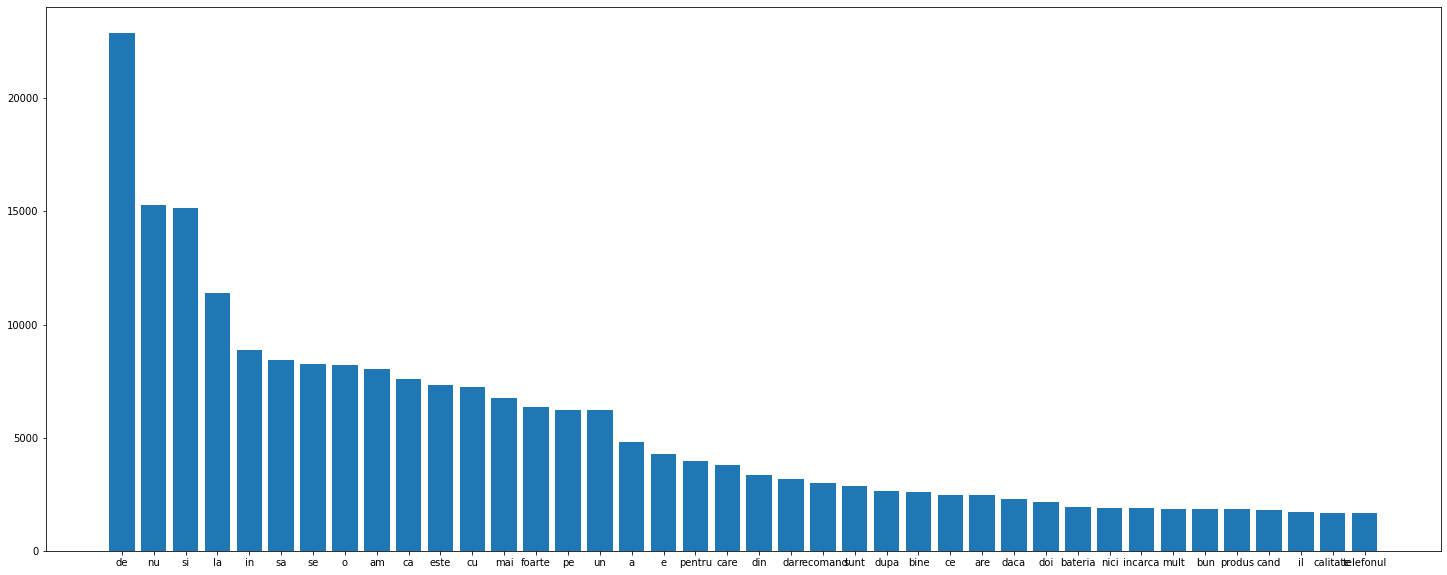

In [78]:
N = 40
plt.figure(figsize=(25, 10))
plt.bar(list(map(lambda el: el[0], sorted_frequency_tokenized[:N])), list(map(lambda el: el[1], sorted_frequency_tokenized[:N])), orientation='vertical')
plt.show()


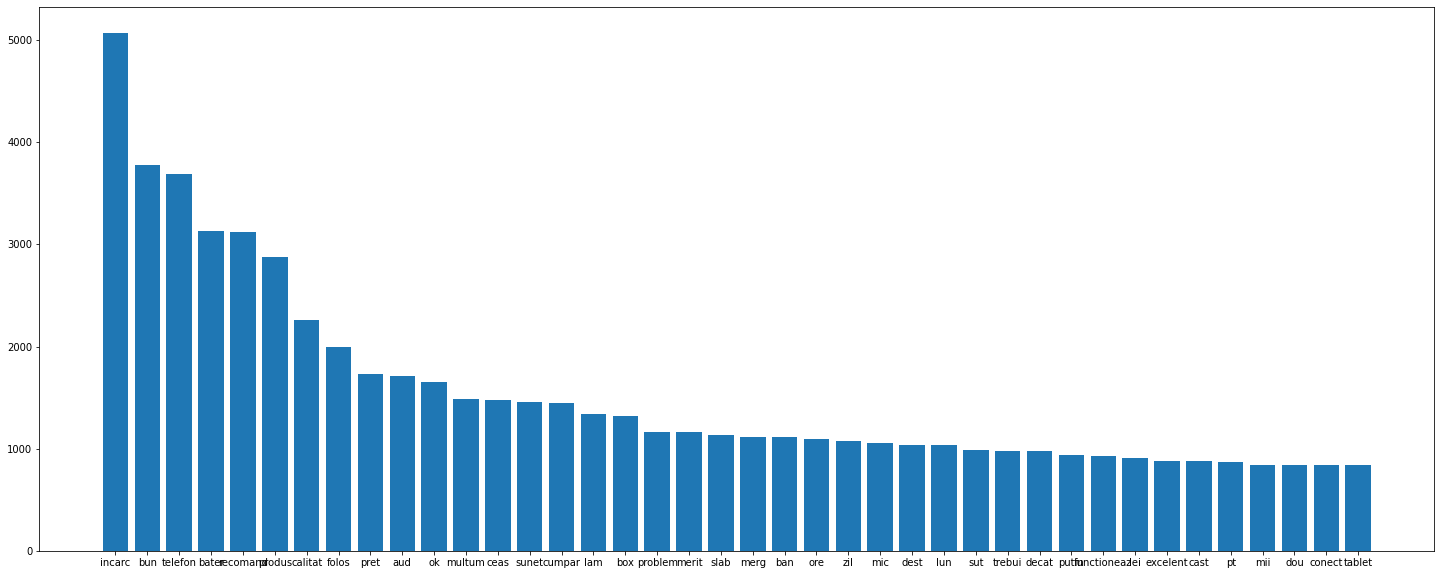

In [79]:
N = 40
plt.figure(figsize=(25, 10))
plt.bar(list(map(lambda el: el[0], sorted_frequency_stemmed[:N])), list(map(lambda el: el[1], sorted_frequency_stemmed[:N])), orientation='vertical')
plt.show()

### Se poate observa ca frecventele de stopwords iau primele 30+ locuri de frecventa, deoarece in frecventa care le include top 30+ nu se pooate regasi in cea de-a doua plotare care exclude stopwords, deci am putea spune ca scoaterea stopwords-urilor reduce numarul de date destul de mult dar in acelasi timp pierdem probabil destul de putin continut, deoarece stopwords nu cred ca au o importanta asa mare in invatare

In [ ]:
# 3.

